## Aprendizaje de maquina - TP 3 (Diagnóstico de cáncer de mama)

### Importando bibliotecas

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

### Carga y analisis de datos

In [6]:
cancer_tissues_df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

In [7]:
cancer_tissues_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Dimensiones del dataset

In [8]:
cancer_tissues_df.shape

(569, 33)

Tipos de datos en el dataset

In [9]:
cancer_tissues_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Puede verse que todos los datos son de tipo float64 excepto el id, que es int64 y la variable target, que es string. A continuacion voy a analizar si los casos malignos y benignos estan balanceados

In [11]:
cancer_tissues_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Si bien la distribucion no es 50/50, no es tanta como para tener que hacer resampling. Ademas, al ser solo dos categorias, se trata de un problema de clasificacion binaria

### Preparacion de datos

In [12]:
cancer_tissues_df_copy = cancer_tissues_df.copy()

Drop de las columnas 'id' y 'Unnamed: 32' ya que no poseen informacion relevante

In [19]:
cancer_tissues_df_copy = cancer_tissues_df_copy.drop(columns = ['id', 'Unnamed: 32'])

In [20]:
cancer_tissues_df_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Convierto la variable target a 0 o 1 para que sea numerica

In [21]:
def converting_target_to_int(register):
  if register == 'B':
    return 0
  else:
    return 1

In [24]:
cancer_tissues_df_copy['diagnosis'] = cancer_tissues_df_copy['diagnosis'].apply(converting_target_to_int)

In [26]:
cancer_tissues_df_copy['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [36]:
cancer_tissues_df_copy.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Separo en target y features

In [35]:
x_data = cancer_tissues_df_copy.drop(columns = ['diagnosis'])
y_data = cancer_tissues_df_copy['diagnosis']

In [33]:
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### Creacion del modelo y evaluacion (Random forest classifier)

Separo en training set y test set

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [120]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,0.1840,0.05680,0.3031,1.3850,2.177,27.41,0.004775,0.011720,0.01947,0.01269,0.01870,0.002626,16.51,32.29,107.40,826.4,0.1060,0.13760,0.16110,0.10950,0.2722,0.06956
82,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.056930,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.1573,0.60760,0.64760,0.28670,0.2355,0.10510
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.047,12.69,0.004928,0.003012,0.00262,0.00339,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
266,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.01365,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.25150,0.19160,0.07926,0.2940,0.07587
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.000000,0.1903,0.06422,0.1988,0.4960,1.218,12.26,0.006040,0.005656,0.00000,0.00000,0.02277,0.003220,10.62,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151


In [121]:
y_train.head()

542    0
82     1
315    0
266    0
140    0
Name: diagnosis, dtype: int64

Creacion del mode (Random forest classifier)

In [122]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 99, min_samples_leaf = 40)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

Matriz de confusion

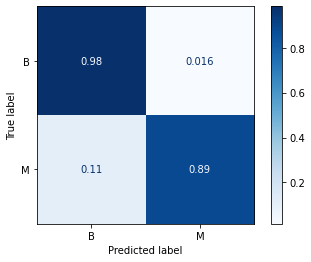

In [123]:
plot_confusion_matrix(rf, x_train, y_train,
                      display_labels = ['B','M'],
                      cmap = 'Blues',
                      normalize = 'true',
                     )

Con esta preparacion de datos e hiperparametros, el modelo que se obtiene logra clasificar muy satisfactoriamente los casos (los valores de falsos positivos y falsos negativos son muy chicos)

Curva ROC

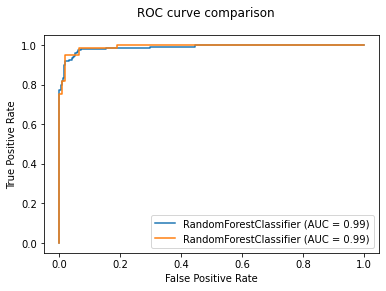

In [124]:
tr_disp = plot_roc_curve(rf, x_train, y_train)
ts_disp = plot_roc_curve(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Tanto la curva ROC de test como train dan iguales, por lo que se descarta overfitting

Metricas

In [125]:
y_predicted_tr = rf.predict(x_train)
y_predicted_ts = rf.predict(x_test)

In [126]:
print(classification_report(y_train, y_predicted_tr))
print(classification_report(y_test, y_predicted_ts))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       247
           1       0.97      0.89      0.93       151

    accuracy                           0.95       398
   macro avg       0.95      0.94      0.94       398
weighted avg       0.95      0.95      0.95       398

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       110
           1       0.96      0.90      0.93        61

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Puede verse que las metricas son similares para training como para tests

### Creacion del modelo y evaluacion (XGBoost)

Utilizando la separacion en training set y tests set del modelo anterior, entreno un modelo XGBoost

In [127]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Matriz de confusion

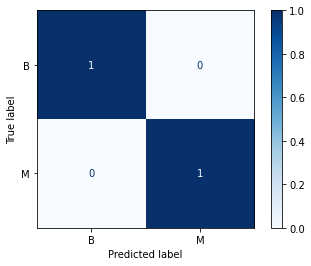

In [128]:
plot_confusion_matrix(xgb_classifier, x_train, y_train,
                      display_labels = ['B','M'],
                      cmap = 'Blues',
                      normalize = 'true',
                     )

Curva ROC

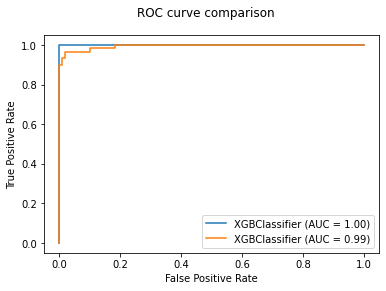

In [129]:
tr_disp = plot_roc_curve(xgb_classifier, x_train, y_train)
ts_disp = plot_roc_curve(xgb_classifier, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Metricas

In [130]:
y_predicted_tr = xgb_classifier.predict(x_train)
y_predicted_ts = xgb_classifier.predict(x_test)

In [131]:
print(classification_report(y_train, y_predicted_tr))
print(classification_report(y_test, y_predicted_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       151

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.98      0.92      0.95        61

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



### Insights

A traves de dos modelos de clasificacion, se logro llegar a modelos que pueden predecir satisfactoriamente si un tumor es benigno o maligno. Sin embargo, a partir de las metricas para ambos, el segundo no parece ser confiable, ya que los valores dan lo ideal, y esto no suele aplicarse a la realidad, por lo que elegiria random forest (sus metricas son mas reales)